Loading dataset from: DatasetForCoffeeSales2.csv
Date converted to datetime.
Columns: ['Date', 'Customer_ID', 'City', 'Category', 'Product', 'Unit Price', 'Quantity', 'Sales Amount', 'Used_Discount', 'Discount_Amount', 'Final Sales', 'Coffee_Bean_Type', 'Bean_Category', 'Price_Category', 'Month']


<ipython-input-4-903a24af195d>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Coffee_Bean_Type', order=df['Coffee_Bean_Type'].value_counts().index, palette='Oranges_r')


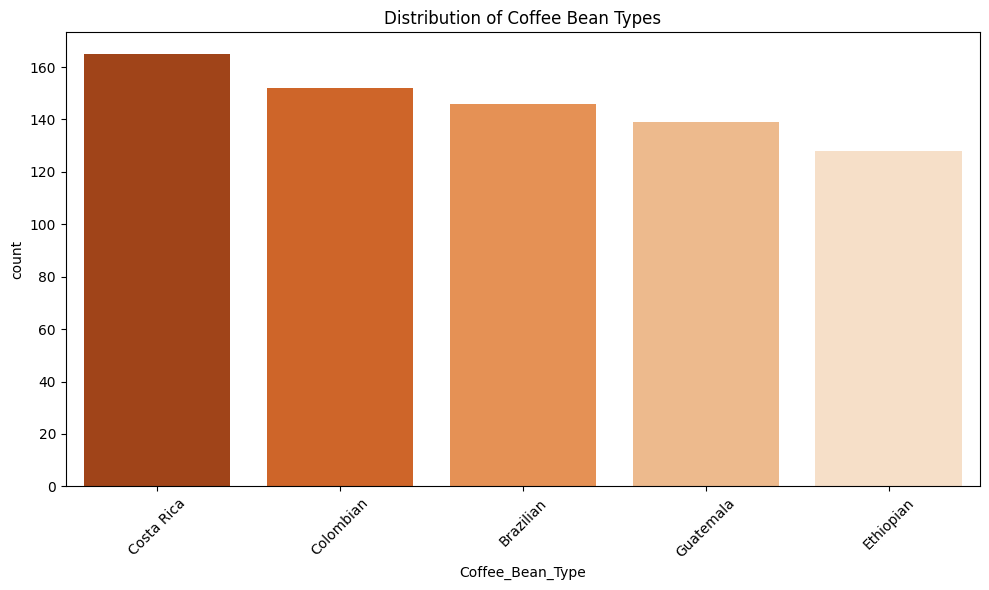

<ipython-input-4-903a24af195d>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Price_Category', order=['Budget', 'Standard', 'Premium', 'Luxury'], palette='Blues_d')


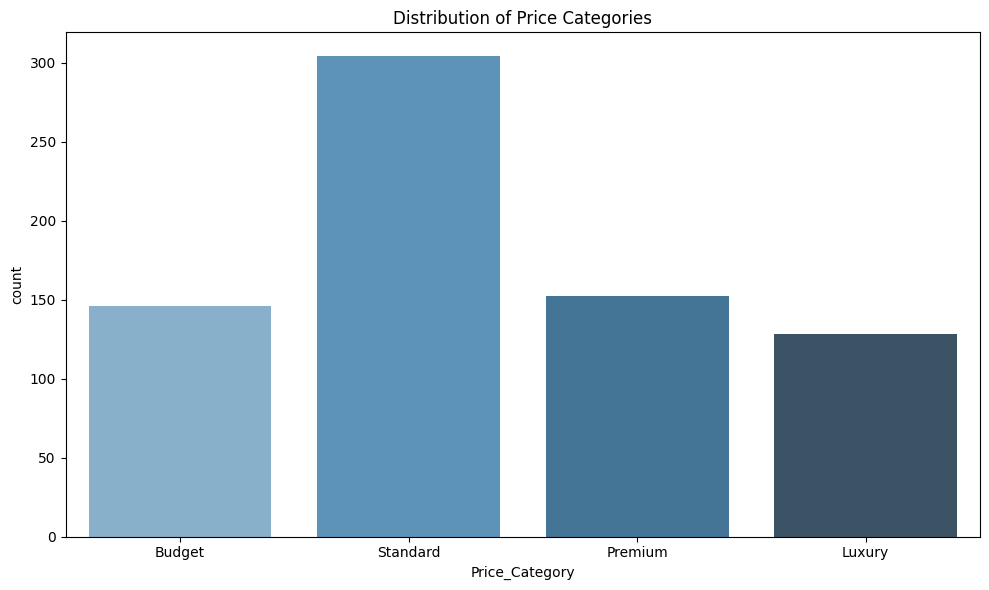

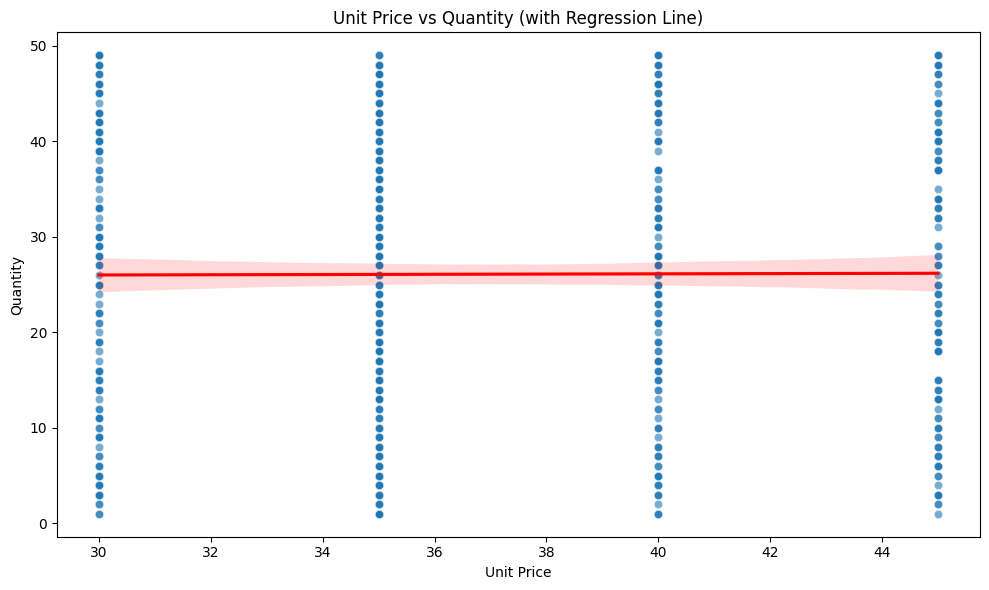

<ipython-input-4-903a24af195d>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Bean_Category', y='Quantity', palette='Set2')


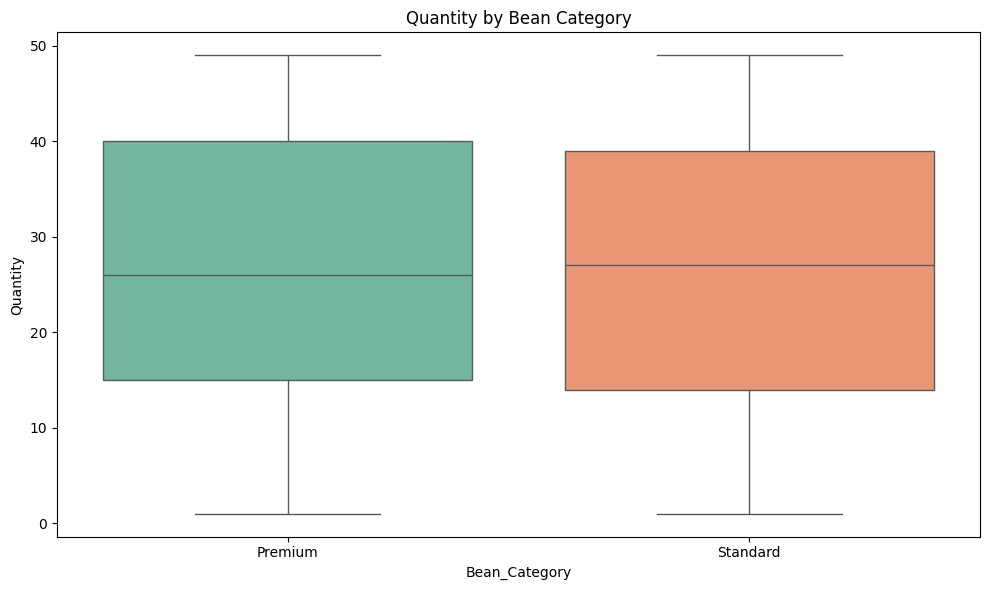

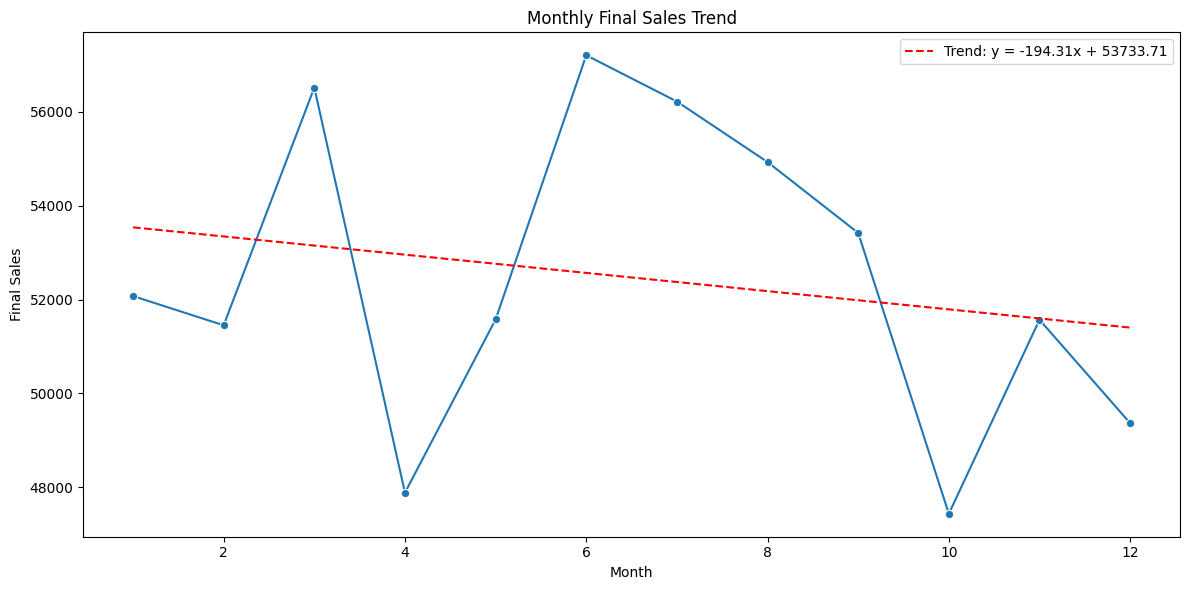

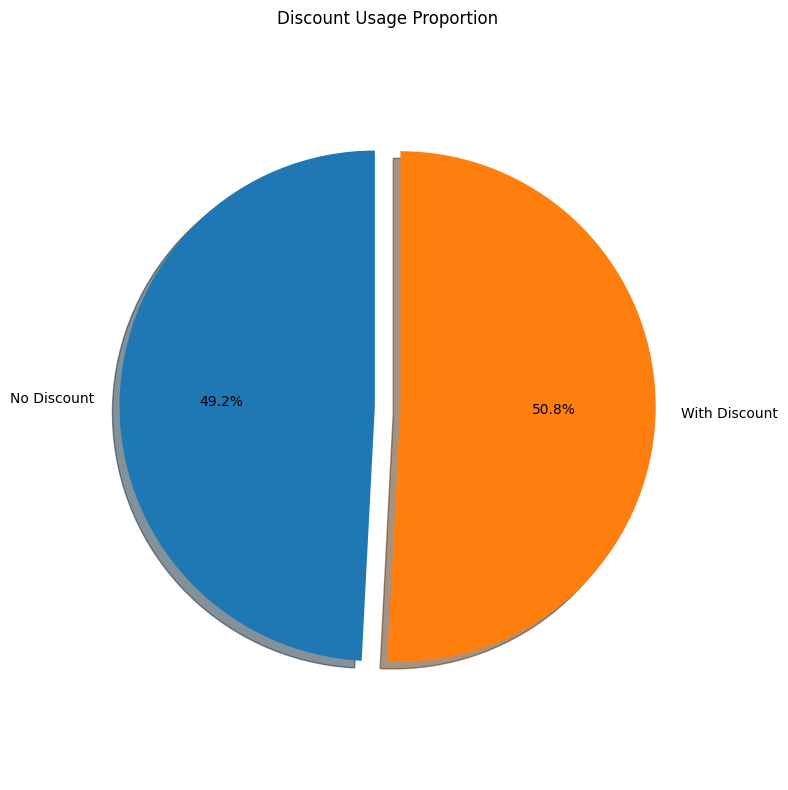

<ipython-input-4-903a24af195d>:114: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['City'].isin(top_cities)], x='City', y='Quantity', estimator=sum, ci=None, palette='viridis')
<ipython-input-4-903a24af195d>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['City'].isin(top_cities)], x='City', y='Quantity', estimator=sum, ci=None, palette='viridis')


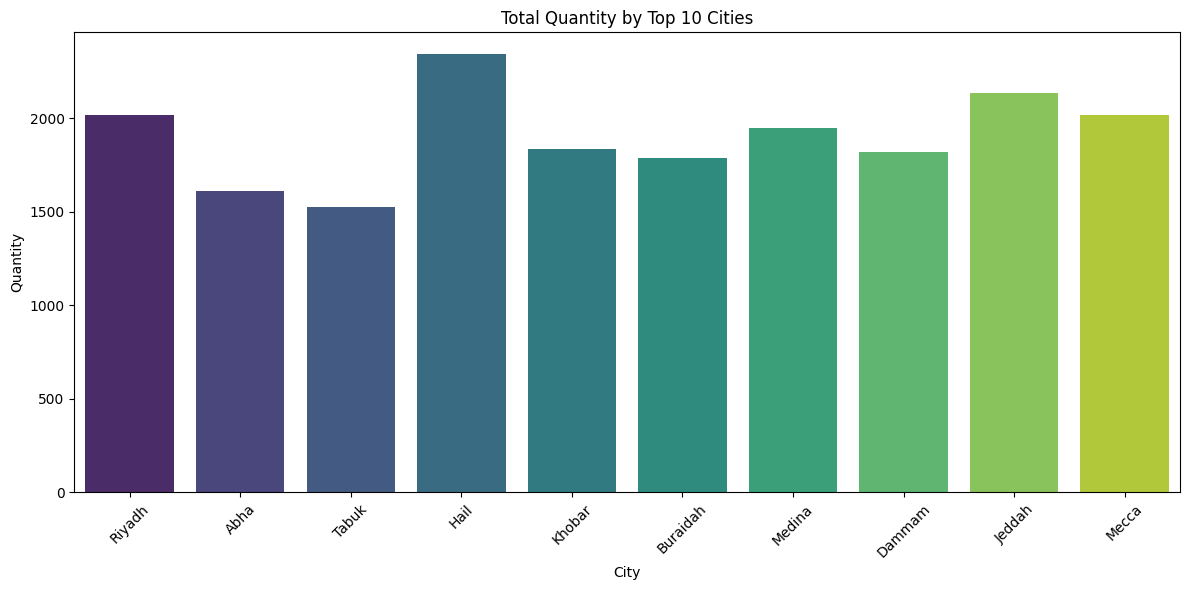

<ipython-input-4-903a24af195d>:123: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['City'].isin(top_cities)], x='City', y='Unit Price', estimator=np.mean, ci=None, palette='crest')
<ipython-input-4-903a24af195d>:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['City'].isin(top_cities)], x='City', y='Unit Price', estimator=np.mean, ci=None, palette='crest')


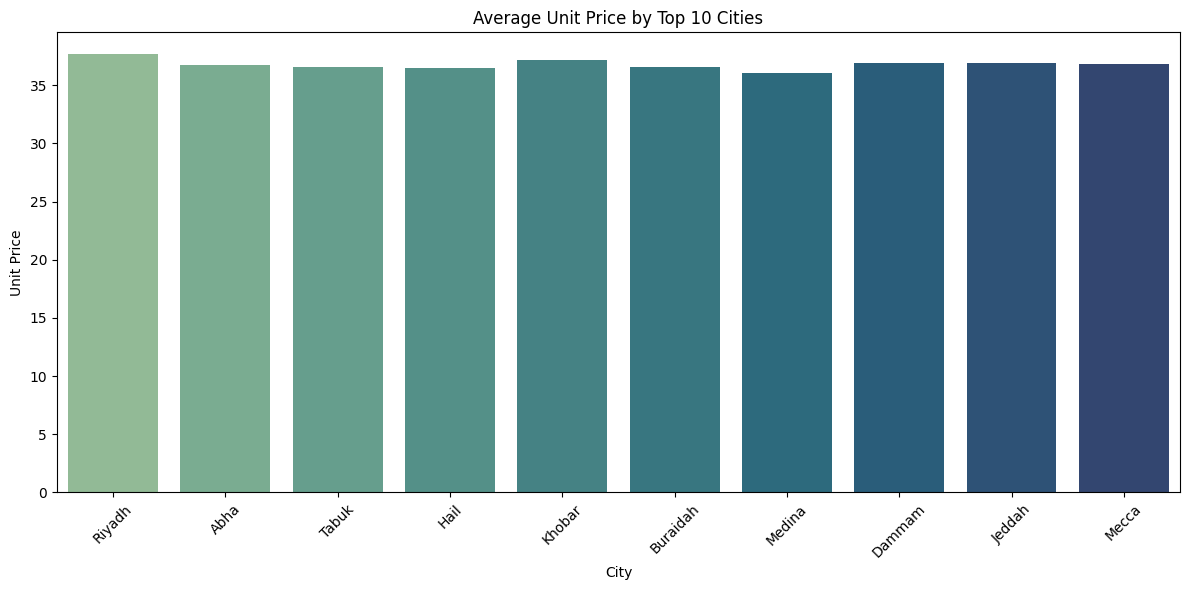

<ipython-input-4-903a24af195d>:132: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Coffee_Bean_Type', y='Final Sales', estimator=sum, ci=None, palette='rocket')
<ipython-input-4-903a24af195d>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Coffee_Bean_Type', y='Final Sales', estimator=sum, ci=None, palette='rocket')


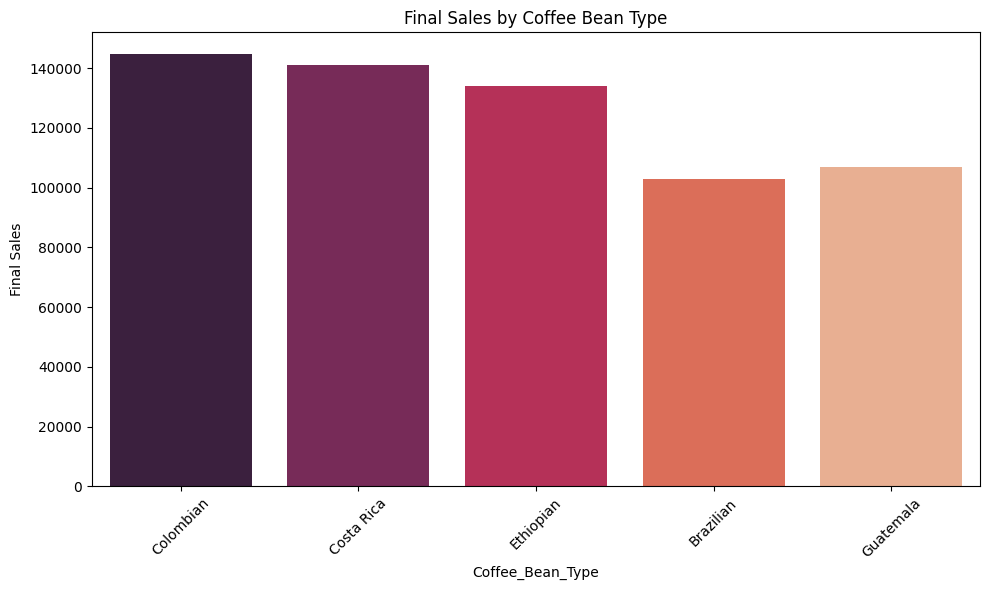

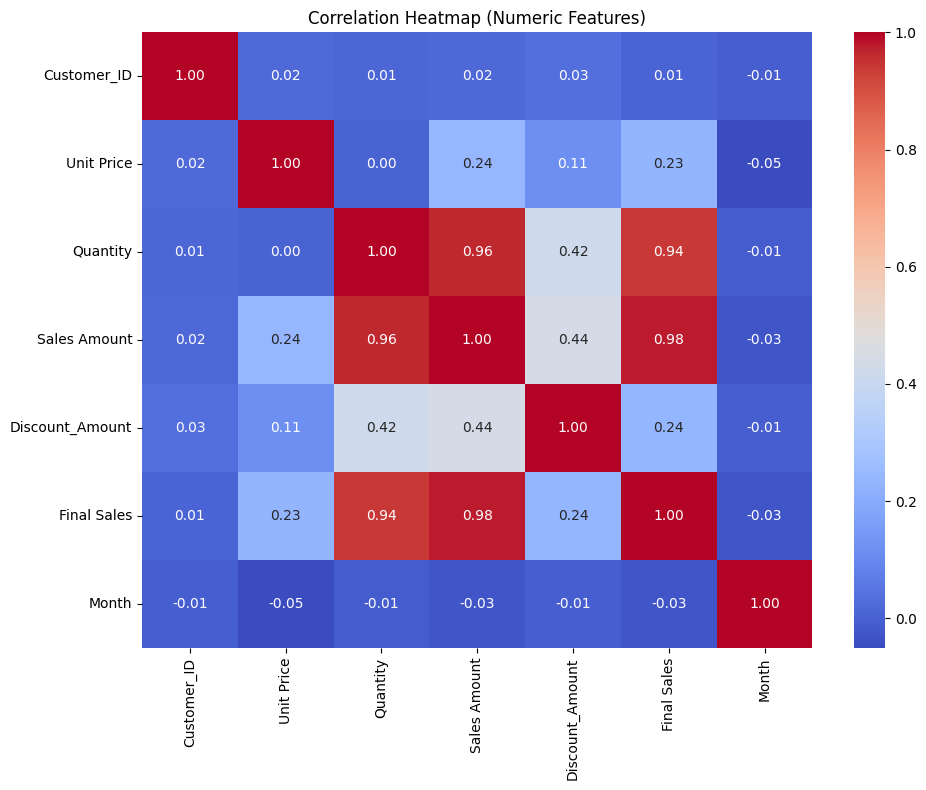

<ipython-input-4-903a24af195d>:150: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='Quantity', hue='Bean_Category', estimator='sum', ci=None, marker='o')


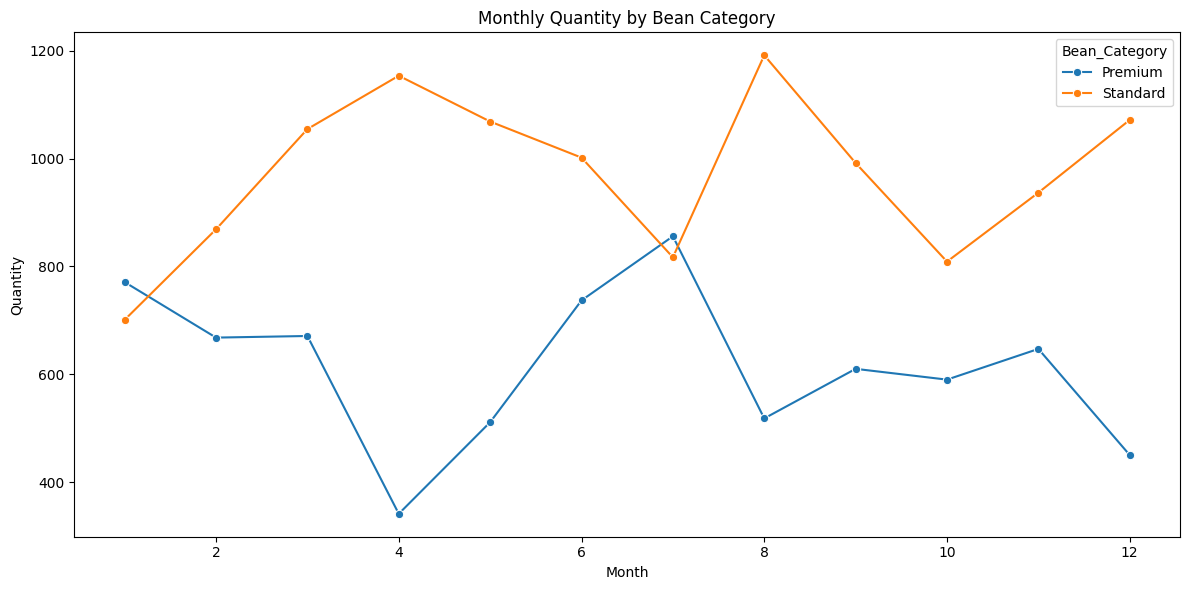

<ipython-input-4-903a24af195d>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Price_Category', y='Final Sales', palette='pastel', order=['Budget', 'Standard', 'Premium', 'Luxury'])


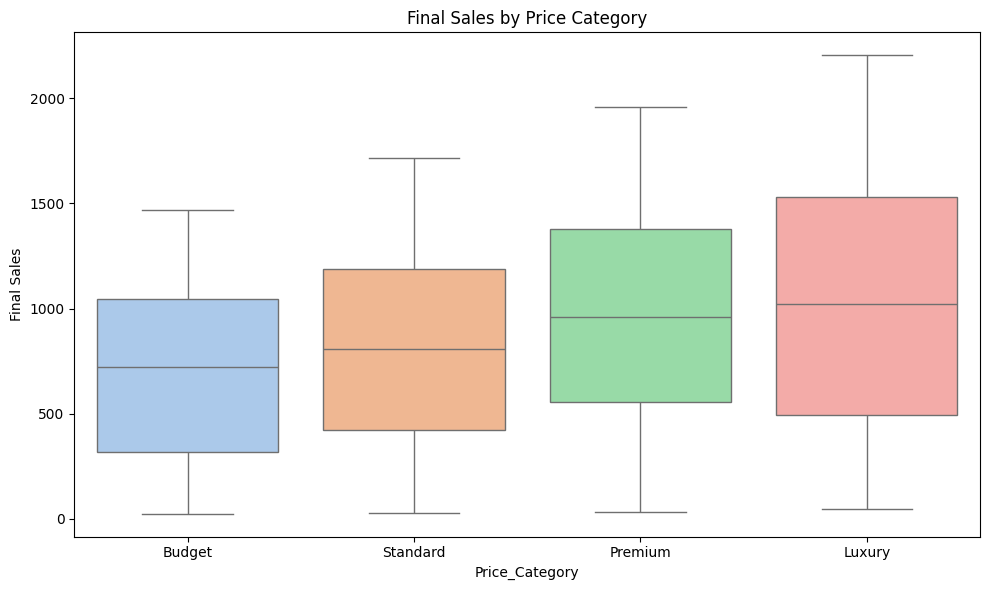

All 12 visualizations have been generated and saved in the 'visualizations/' directory.


In [4]:
# 04 - Extended Visualizations: Coffee Bean Sales Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# Create directory to store plots
os.makedirs('visualizations', exist_ok=True)

# Load dataset from common paths
dataset_path = None
for path in ['data/coffee_sales_prepared.csv', 'coffee_sales_prepared.csv',
             'DatasetForCoffeeSales2.csv', 'data/DatasetForCoffeeSales2.csv']:
    if os.path.exists(path):
        dataset_path = path
        break

if not dataset_path:
    raise FileNotFoundError("Dataset not found.")

print(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path)

# Convert date column
try:
    df['Date'] = pd.to_datetime(df['Date'])
    print("Date converted to datetime.")
except:
    print("Warning: Date column could not be converted.")

# Add missing derived columns
if 'Coffee_Bean_Type' not in df.columns and 'Product' in df.columns:
    df['Coffee_Bean_Type'] = df['Product']

if 'Bean_Category' not in df.columns:
    df['Bean_Category'] = df['Unit Price'].apply(lambda x: 'Premium' if x >= 40 else 'Standard')

if 'Price_Category' not in df.columns:
    df['Price_Category'] = df['Unit Price'].map({30: 'Budget', 35: 'Standard', 40: 'Premium', 45: 'Luxury'})

if 'Month' not in df.columns:
    df['Month'] = df['Date'].dt.month

print(f"Columns: {list(df.columns)}")

# 1. Distribution of Coffee Bean Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Coffee_Bean_Type', order=df['Coffee_Bean_Type'].value_counts().index, palette='Oranges_r')
plt.title('Distribution of Coffee Bean Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visualizations/bean_distribution.png')
plt.show()

# 2. Distribution of Price Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Price_Category', order=['Budget', 'Standard', 'Premium', 'Luxury'], palette='Blues_d')
plt.title('Distribution of Price Categories')
plt.tight_layout()
plt.savefig('visualizations/price_categories.png')
plt.show()

# 3. Scatter Plot with Regression Line: Price vs Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unit Price', y='Quantity', alpha=0.6)
sns.regplot(data=df, x='Unit Price', y='Quantity', scatter=False, color='red')
plt.title('Unit Price vs Quantity (with Regression Line)')
plt.tight_layout()
plt.savefig('visualizations/price_vs_quantity.png')
plt.show()

# 4. Quantity by Bean Category (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Bean_Category', y='Quantity', palette='Set2')
plt.title('Quantity by Bean Category')
plt.tight_layout()
plt.savefig('visualizations/boxplot_bean_category.png')
plt.show()

# 5. Monthly Final Sales Trend with Regression
monthly_sales = df.groupby('Month')['Final Sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
z = np.polyfit(monthly_sales.index, monthly_sales.values, 1)
p = np.poly1d(z)
plt.plot(monthly_sales.index, p(monthly_sales.index), "r--", label=f"Trend: y = {z[0]:.2f}x + {z[1]:.2f}")
plt.title('Monthly Final Sales Trend')
plt.xlabel('Month')
plt.ylabel('Final Sales')
plt.legend()
plt.tight_layout()
plt.savefig('visualizations/monthly_sales_trend.png')
plt.show()

# 6. Discount Usage Pie Chart
plt.figure(figsize=(8, 8))
counts = df['Used_Discount'].value_counts()
labels = ['No Discount', 'With Discount']
values = [counts.get(False, 0), counts.get(True, 0)]
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=(0, 0.1), startangle=90, shadow=True)
plt.title('Discount Usage Proportion')
plt.axis('equal')
plt.tight_layout()
plt.savefig('visualizations/discount_usage.png')
plt.show()

# 7. Quantity by Top 10 Cities (Barplot)
plt.figure(figsize=(12, 6))
top_cities = df['City'].value_counts().nlargest(10).index
sns.barplot(data=df[df['City'].isin(top_cities)], x='City', y='Quantity', estimator=sum, ci=None, palette='viridis')
plt.title('Total Quantity by Top 10 Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visualizations/quantity_by_city.png')
plt.show()

# 8. Average Unit Price by City
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['City'].isin(top_cities)], x='City', y='Unit Price', estimator=np.mean, ci=None, palette='crest')
plt.title('Average Unit Price by Top 10 Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visualizations/avg_price_by_city.png')
plt.show()

# 9. Total Final Sales by Coffee Bean Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Coffee_Bean_Type', y='Final Sales', estimator=sum, ci=None, palette='rocket')
plt.title('Final Sales by Coffee Bean Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visualizations/sales_by_bean_type.png')
plt.show()

# 10. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.savefig('visualizations/correlation_heatmap.png')
plt.show()

# 11. Monthly Quantity by Bean Category
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Quantity', hue='Bean_Category', estimator='sum', ci=None, marker='o')
plt.title('Monthly Quantity by Bean Category')
plt.tight_layout()
plt.savefig('visualizations/monthly_quantity_by_category.png')
plt.show()

# 12. Final Sales by Price Category (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price_Category', y='Final Sales', palette='pastel', order=['Budget', 'Standard', 'Premium', 'Luxury'])
plt.title('Final Sales by Price Category')
plt.tight_layout()
plt.savefig('visualizations/boxplot_sales_by_price_category.png')
plt.show()

# Completion
print("All 12 visualizations have been generated and saved in the 'visualizations/' directory.")
